In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data['Pregnancies'].isna().sum()

0

In [6]:
#feature selection
X=pd.DataFrame(data,columns=['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction'])
Y=pd.DataFrame(data,columns=['Outcome'])

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
X_test

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
285,7,135,26.0,51,136,74,0.647
101,1,0,26.1,22,151,60,0.179
581,6,0,25.0,27,109,60,0.206
352,3,0,34.4,46,61,82,0.243
726,1,180,36.1,25,116,78,0.496
...,...,...,...,...,...,...,...
241,4,88,33.1,22,91,70,0.446
599,1,120,23.1,26,109,38,0.407
650,1,100,25.2,23,91,54,0.234
11,10,0,38.0,34,168,74,0.537


In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


In [11]:
!pip install graphviz
!pip install pydotplus
!pip install six
#for graphiz to work
#step 1: conda install python-graphiz
#step 2: set path in the environmental variables and restart your system ( c drive/users/anaconda3/library/bin/graphiz)

In [12]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,e3o
                special_characters=True,
                feature_names = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction'],
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

SyntaxError: invalid syntax (<ipython-input-12-add11cce8cad>, line 9)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

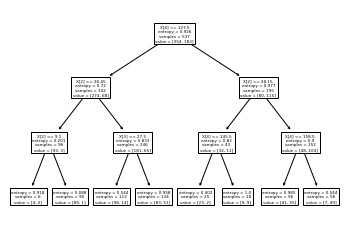

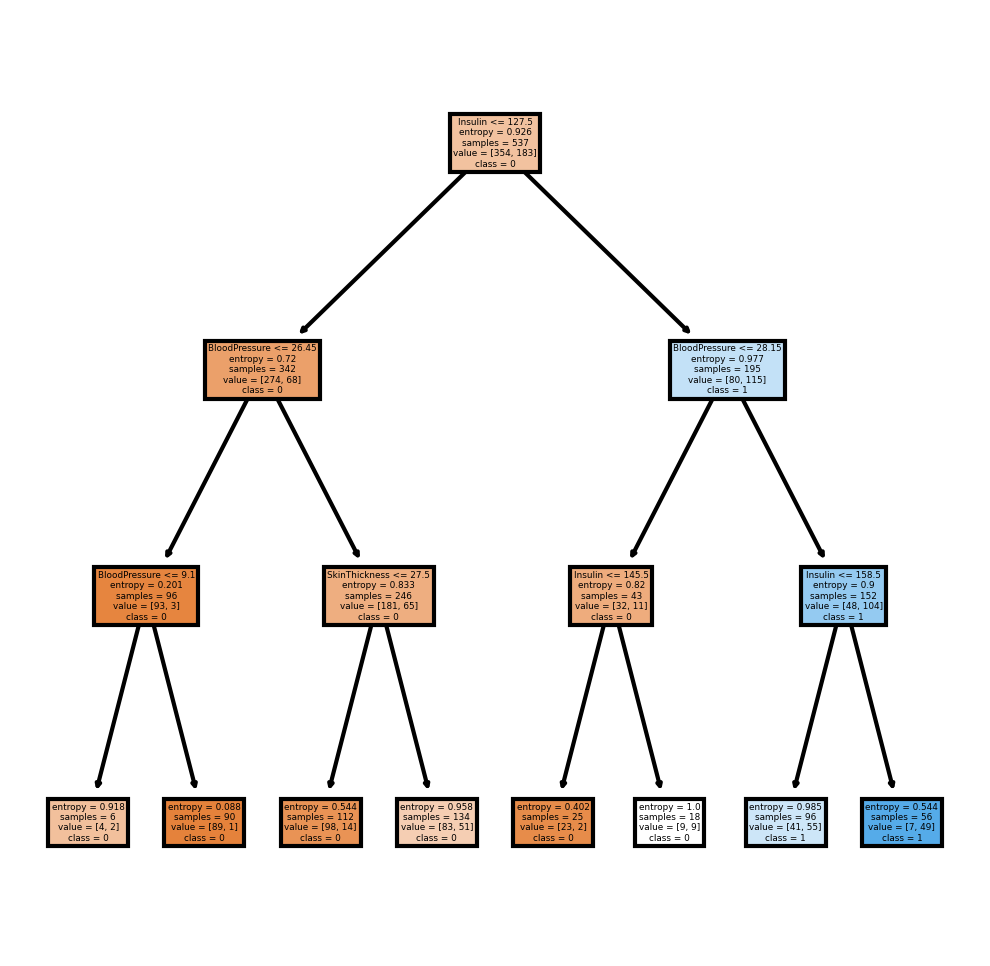

In [16]:
from sklearn import tree
tree.plot_tree(clf)


import matplotlib.pyplot as plt
fn=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')